In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('C:/Users/denpo/Desktop/ДроныДипломУсловие/busy_day.in') as file:
    in_list = file.read().splitlines()

In [4]:
print('rows, columns, number of drones, max turns, maxpay load:',in_list[0])

rows, columns, number of drones, max turns, maxpay load: 400 600 30 112993 200


In [5]:
print('Number of product types: ', in_list[1])
print('Product types weights: ', in_list[2])
product_weights = np.array(in_list[2].split())
product_weights = product_weights.astype(np.int16)

Number of product types:  400
Product types weights:  73 40 84 107 52 36 13 74 36 94 93 46 123 24 100 93 62 49 97 102 80 37 22 25 72 48 40 74 32 31 136 64 99 37 44 36 104 74 112 40 65 67 50 143 23 26 91 20 142 128 9 77 40 26 55 104 59 112 42 69 87 89 2 11 105 43 105 23 21 88 57 40 52 63 35 141 54 27 45 37 21 37 102 38 36 117 57 93 24 52 83 133 51 102 34 52 39 54 64 146 127 100 58 50 49 40 55 123 64 30 127 63 19 59 31 22 68 37 107 68 52 61 35 38 76 44 21 144 21 40 105 48 97 70 74 95 75 28 25 40 81 72 58 99 52 5 72 84 53 21 110 97 30 43 92 109 39 89 51 30 102 94 13 45 93 94 90 104 36 55 92 12 45 126 73 132 118 127 125 26 83 69 49 39 4 63 84 47 75 43 82 43 51 28 118 110 42 2 53 74 54 57 92 23 72 95 76 35 38 100 52 34 58 74 86 25 32 61 39 55 76 68 107 82 97 108 57 38 88 71 22 40 63 37 80 51 52 52 67 101 49 46 100 52 63 36 53 45 51 56 71 50 13 29 18 36 87 86 39 11 148 74 74 121 11 28 65 79 32 85 95 26 43 123 81 78 25 100 27 90 53 60 100 25 72 80 83 40 62 53 40 97 105 56 49 100 36 46 80 8 23

In [6]:
print('Number of warehouses: ', in_list[3])
num_wh = in_list[3]
print('1st wh location: ',in_list[4])
print('Number of products in 1st wh: ', in_list[5])
print('2nd wh location: ',in_list[6])

Number of warehouses:  10
1st wh location:  113 179
Number of products in 1st wh:  0 0 5 1 0 0 0 0 2 0 4 0 0 0 0 8 11 5 0 0 0 4 0 0 0 0 7 0 0 0 0 46 1 6 3 9 3 3 2 0 3 0 1 4 0 3 2 1 3 0 2 0 2 0 0 0 0 9 0 0 2 5 1 4 13 1 0 0 0 0 5 0 16 50 3 0 4 1 0 0 0 5 2 2 0 4 0 0 3 0 0 2 23 0 0 2 10 0 0 7 11 1 0 8 9 0 1 0 0 2 6 6 2 0 6 3 0 0 1 3 5 0 3 2 4 0 3 9 0 2 0 0 2 10 0 0 4 4 2 0 15 0 0 1 4 0 1 0 0 5 6 5 2 0 6 0 0 67 0 0 0 0 0 8 5 0 0 6 59 3 0 0 8 3 0 1 1 1 4 29 3 6 38 0 0 0 7 1 1 4 2 1 0 0 7 0 0 0 0 5 0 7 1 1 1 6 1 0 3 0 8 0 0 0 4 4 7 0 7 9 0 7 0 6 0 4 0 4 0 1 3 0 0 0 0 0 2 8 0 8 3 5 10 6 0 1 2 46 0 11 0 0 4 1 0 1 0 0 0 4 1 0 2 3 0 0 1 0 4 11 8 5 46 0 0 3 54 40 7 0 3 2 0 11 0 3 0 2 2 0 8 2 1 5 6 0 57 8 0 12 7 6 0 0 2 0 0 0 0 0 4 0 0 1 2 0 0 4 1 0 0 0 2 4 0 2 4 2 2 1 3 0 0 0 0 0 0 0 0 0 1 0 3 2 0 3 0 5 5 0 5 0 0 0 0 0 0 0 0 3 8 4 0 0 0 0 0 0 10 0 0 2 0 36 1 5 0 2 5 0 0 15 5 5 0 4 0 1 0 0 3 2 0 2 0 0 11 6 7 0
2nd wh location:  234 599


In [7]:
ware_locs = np.array(in_list[4:24:2])
ware_rows = [wr.split()[0] for wr in ware_locs]
ware_cols = [wc.split()[1] for wc in ware_locs]
ware_df = pd.DataFrame({'ware_row': ware_rows, 'ware_col': ware_cols}).astype(np.uint16)
ware_df

,ware_row,ware_col
0,113,179
1,234,599
2,195,89
3,215,207
4,220,326
5,182,193
6,75,418
7,228,140
8,310,26
9,297,423


In [8]:
print('Number of orders: ', in_list[24])

Number of orders:  1250


In [9]:
ord_locs = np.array(in_list[25:3775:3])

In [10]:
ord_rows = [ord.split()[0] for ord in ord_locs]
ord_cols = [ord.split()[1] for ord in ord_locs]
ord_df = pd.DataFrame({'ord_row': ord_rows, 'ord_col': ord_cols}).astype(np.uint16)
ord_df

,ord_row,ord_col
0,340,371
1,163,320
2,201,331
3,257,290
4,115,512
...,...,...
1245,138,331
1246,109,273
1247,161,291
1248,127,152


In [11]:
wh_prods_df = pd.DataFrame([x.split() for x in in_list[5:24:2]]).T
wh_prods_df.columns=[f'warehouse_{i}' for i in range(10)]
wh_prods_df['prod_weight']= in_list[2].split()
wh_prods_df

,warehouse_0,warehouse_1,warehouse_2,warehouse_3,warehouse_4,warehouse_5,warehouse_6,warehouse_7,warehouse_8,warehouse_9,prod_weight
0,0,0,0,1,1,0,1,0,1,1,73
1,0,0,0,0,0,16,0,0,0,0,40
2,5,3,1,4,6,3,6,6,8,4,84
3,1,1,3,0,1,0,0,0,1,2,107
4,0,1,0,1,2,1,1,0,0,0,52
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,33,0,0,0,0,114
396,11,5,5,6,2,5,5,8,11,7,105
397,6,7,5,5,2,9,5,6,6,5,41
398,7,11,5,8,6,5,5,9,13,6,52


Text(0.5, 0, 'weight')

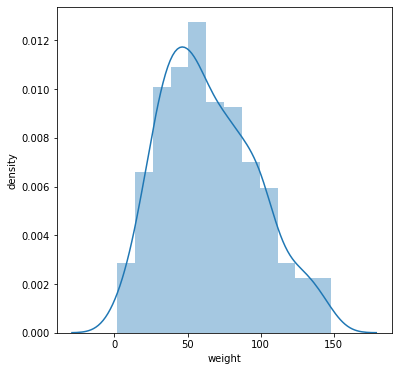

In [12]:
fig = plt.figure(figsize=(6,6))
x = pd.Series(product_weights, name="weight")
ax = sns.distplot(x)
ax.set_ylabel('density')
ax.set_xlabel('weight')

Text(0.5, 0, 'number_of_prods')

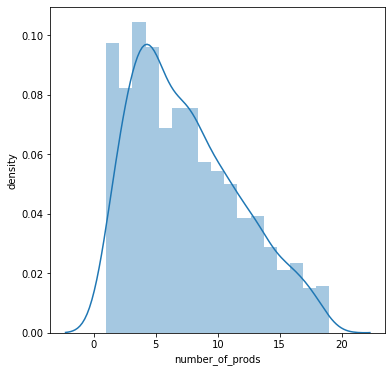

In [13]:
fig = plt.figure(figsize=(6,6))
x= [len(x.split()) for x in in_list[27:3774:3]]
x = pd.Series(x, name="number_of_prods")
ax = sns.distplot(x)
ax.set_ylabel('density')
ax.set_xlabel('number_of_prods')

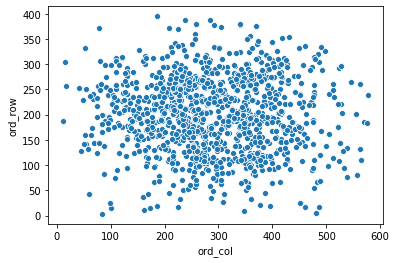

In [14]:
sns.scatterplot(data=ord_df, x="ord_col", y="ord_row")

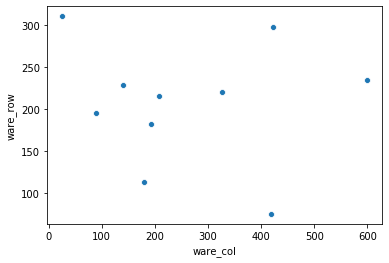

In [15]:
sns.scatterplot(data=ware_df, x="ware_col", y="ware_row")

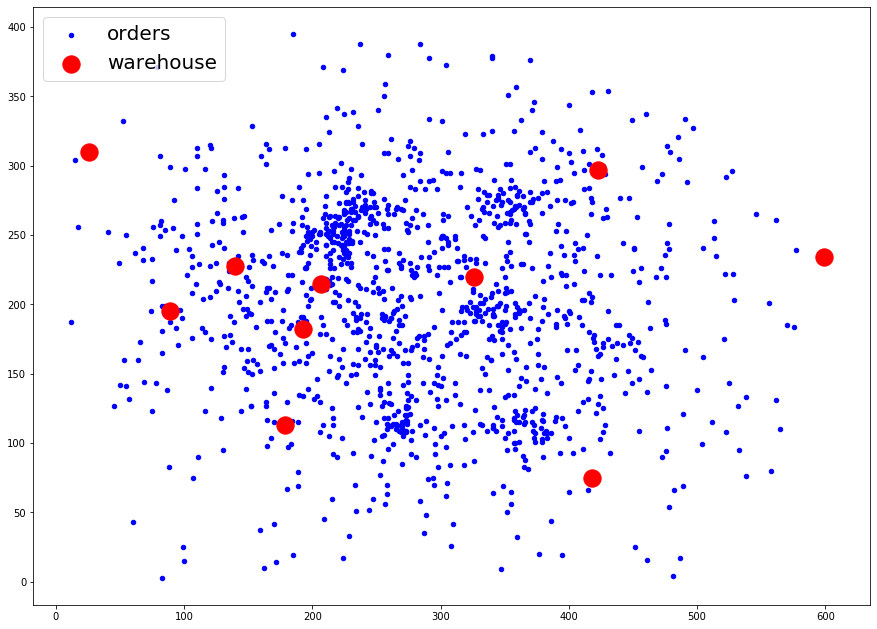

In [16]:
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot()
ax.scatter(ord_df['ord_col'], ord_df['ord_row'], s=20, c='b', marker="o", label='orders')
ax.scatter(ware_df['ware_col'], ware_df['ware_row'], s=300, c='r', marker="o", label='warehouse')
plt.legend(loc='upper left', prop={'size': 20});
plt.show()

In [17]:
ord_prods = in_list[27:3777:3]
def size_of_prod(ordered):
    k = 0;
    new_ar = ordered.split()
    for i in range(len(new_ar)):
        k+= product_weights[int(new_ar[i])-1]
    return k
# функция подсчета массы заказа

In [18]:
k=-1
for i in range(len(ord_prods)):
    if (size_of_prod(ord_prods[i])>k):
        k=size_of_prod(ord_prods[i])
k>200 

True

In [24]:
x = np.array(len(ord_prods))
fig = plt.figure(figsize=(6,6))
for i in range(len(ord_prods)):
    x[i] = size_of_prod(ord_prods[i])
x = pd.Series(x, name="weight_of_order")
ax = sns.distplot(x)
ax.set_ylabel('density')
ax.set_xlabel('weight_of_order')

IndexError: too many indices for array

<Figure size 432x432 with 0 Axes>